In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML

In [3]:
!ls -GFlash ../input/deepfake-detection-challenge

total 12K
   0 drwxr-xr-x 4 nobody    0 Feb  8 15:11 ./
4.0K drwxr-xr-x 3 root   4.0K Mar  1 18:42 ../
8.0K -rw-r--r-- 1 nobody 6.7K Feb  8 15:11 sample_submission.csv
   0 drwxr-xr-x 2 nobody    0 Feb  8 15:11 test_videos/
   0 drwxr-xr-x 2 nobody    0 Feb  8 15:11 train_sample_videos/


In [4]:
!du -sh ../input/deepfake-detection-challenge/

4.2G	../input/deepfake-detection-challenge/


In [5]:
train_sample_metadata = pd.read_json('../input/deepfake-detection-challenge/train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

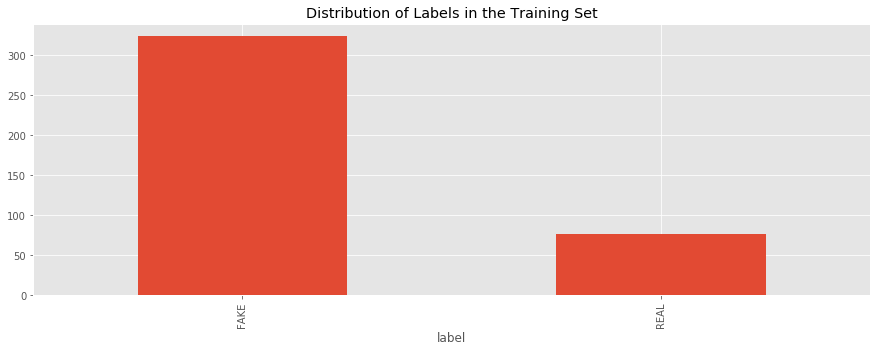

In [6]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

## Example of fake: `aagfhgtpmv.mp4`
![](https://i.imgur.com/ToWjusQ.gif)

Face Recognition :

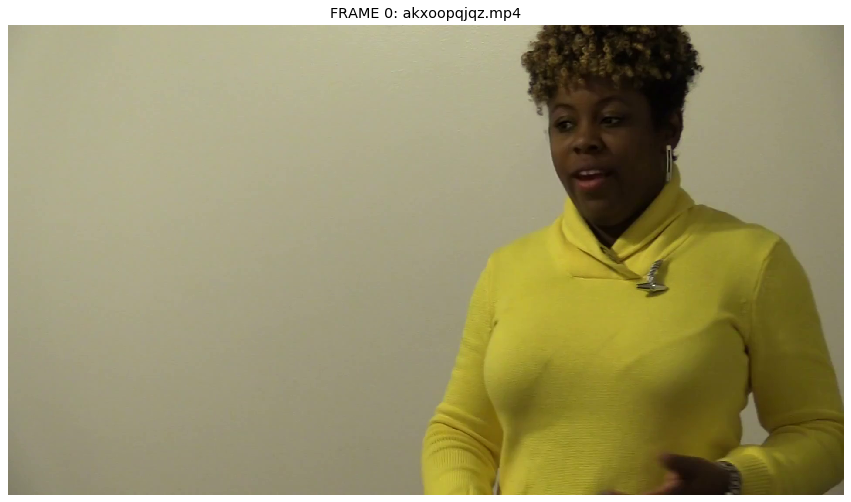

In [7]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = '/kaggle/input/deepfake-detection-challenge/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '/kaggle/input/deepfake-detection-challenge/train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

FaceDetection using OpenCV:

In [8]:
!pip install face_recognition

     |████████████████████████████████| 3.2MB 288kB/s 
     |████████████████████████████████| 100.2MB 112kB/s 
  Created wheel for dlib: filename=dlib-19.23.0-cp36-cp36m-linux_x86_64.whl size=3951723 sha256=99602beeea871c427fc8b886073ecdaf749f458d1e0764e233eb4eb7713a9d26
  Stored in directory: /root/.cache/pip/wheels/17/0e/dd/28e9c9de2ca4e7a05e5493bca325b6b6d47ed3c55db26f8dfc
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=43176a10019f7d9658cabb1ba5368a9006f00feb2bc213735bc1caa95fa66e57
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built dlib face-recognition-models


## Locating a face within an image

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 99, Left: 1168, Bottom: 420, Right: 1489


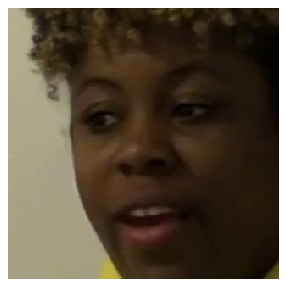

In [9]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

## Locating a face landmarks within an image

In [10]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(1247, 239), (1245, 268), (1247, 297), (1255, 328), (1268, 358), (1285, 387), (1304, 416), (1323, 438), (1350, 445), (1383, 439), (1419, 423), (1453, 399), (1482, 370), (1501, 335), (1507, 295), (1505, 256), (1501, 219)]
The left_eyebrow in this face has the following points: [(1251, 198), (1257, 185), (1272, 181), (1288, 183), (1304, 190)]
The right_eyebrow in this face has the following points: [(1342, 184), (1362, 171), (1386, 165), (1411, 170), (1432, 181)]
The nose_bridge in this face has the following points: [(1324, 219), (1323, 235), (1320, 250), (1319, 267)]
The nose_tip in this face has the following points: [(1301, 294), (1313, 298), (1327, 299), (1343, 296), (1358, 293)]
The left_eye in this face has the following points: [(1264, 234), (1273, 227), (1287, 226), (1303, 230), (1289, 235), (1275, 237)]
The right_eye in this face has the following points: [(1365, 224), (1378, 215), (1394, 215), (1410, 219), (1395, 224), (1379, 22

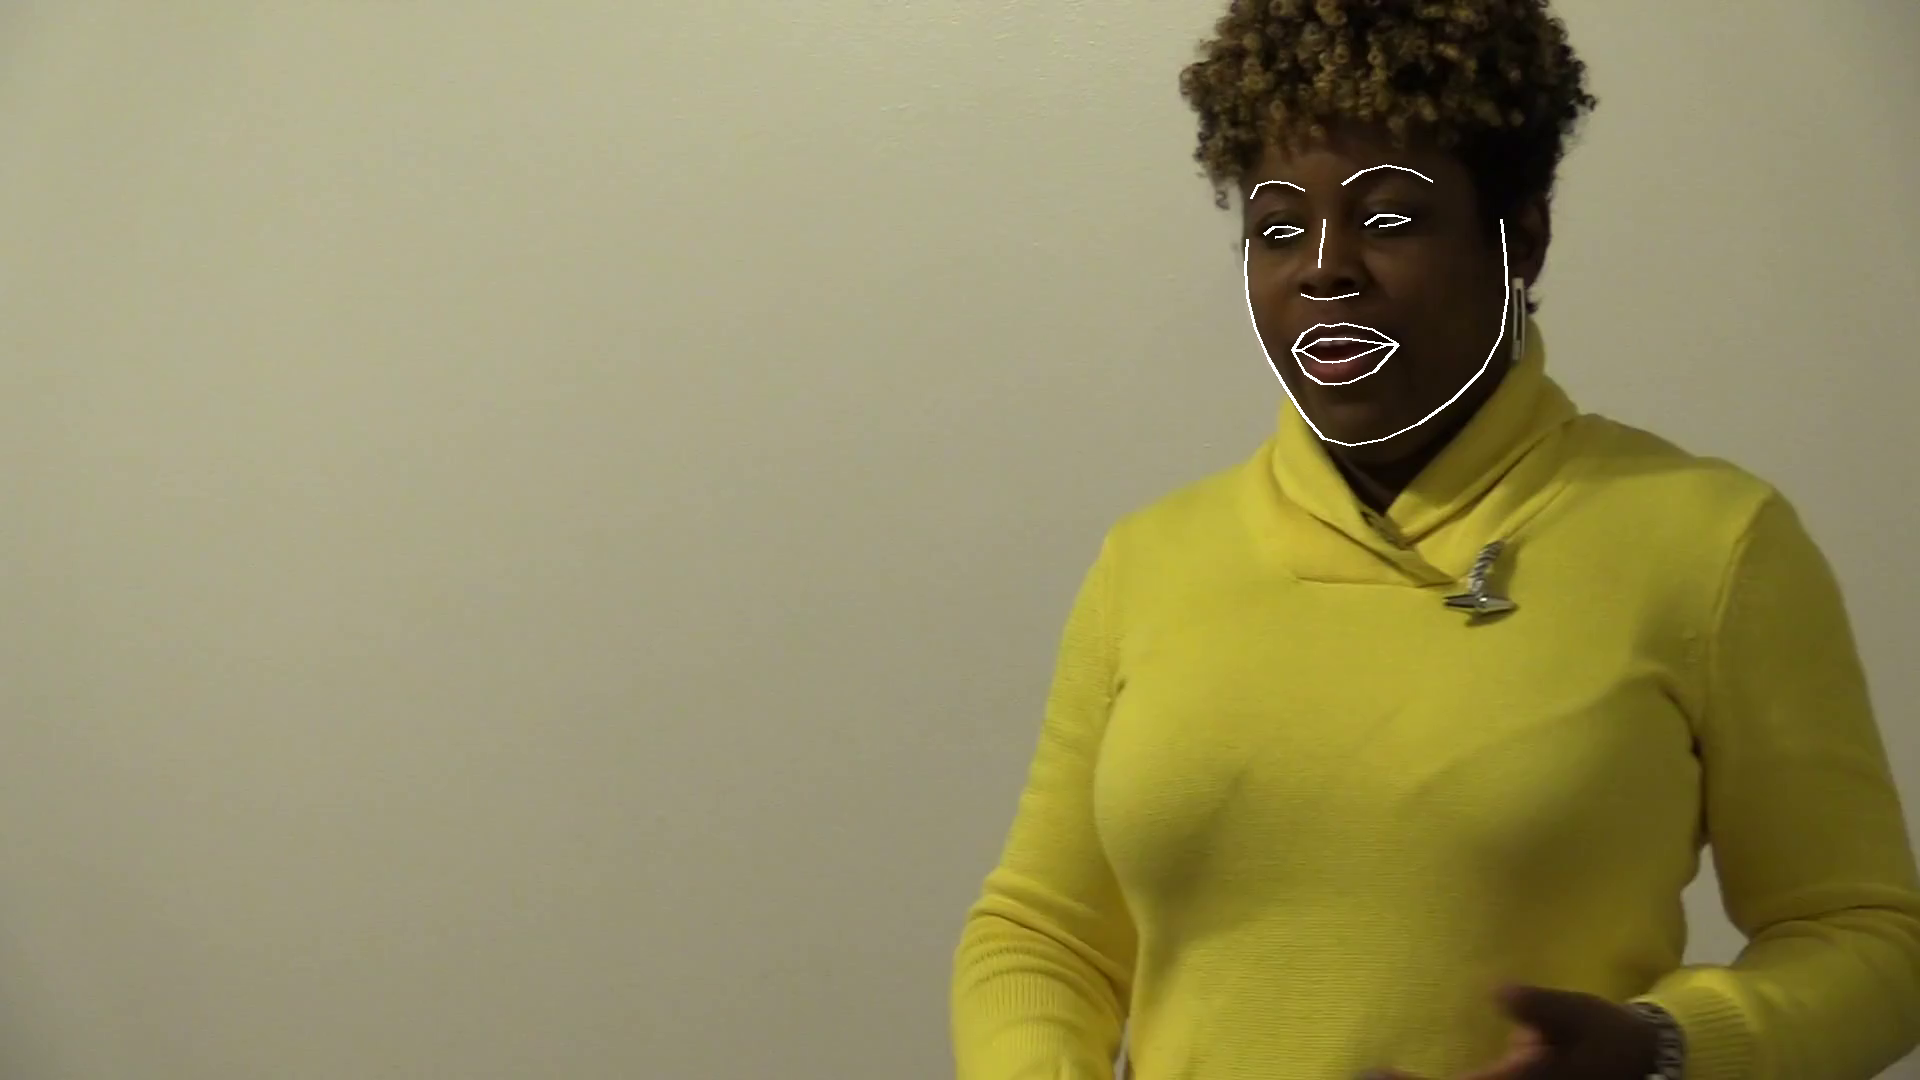

In [11]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_facial_features_in_picture.py
# face_landmarks_list
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

# Displaying many test examples and labels

 Add padding to zoom out of face

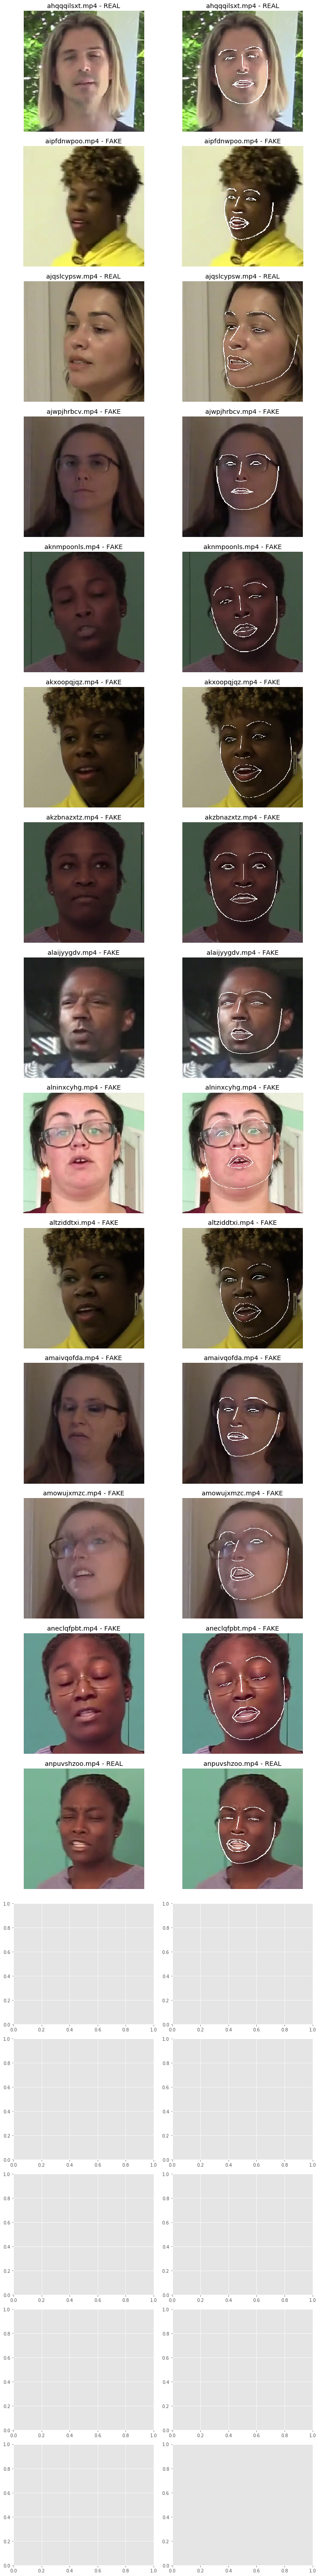

In [12]:
fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60
for fn in train_sample_metadata.index[23:44]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/kaggle/input/deepfake-detection-challenge/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        try:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='white')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
        except:
            pass
plt.grid(False)
plt.tight_layout()
plt.show()

# Frame by Frame Face Detection
- The real power may come from looking at how the "face" changes or doesn't change as the video progresses
- We will take the FAKE example video `akxoopqjqz.mp4`
- First we will loop through the frames of the video file and append them to a list called `frames`

In [13]:
video_file = '/kaggle/input/deepfake-detection-challenge/train_sample_videos/akxoopqjqz.mp4'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


Now we can display some of the frames of this video

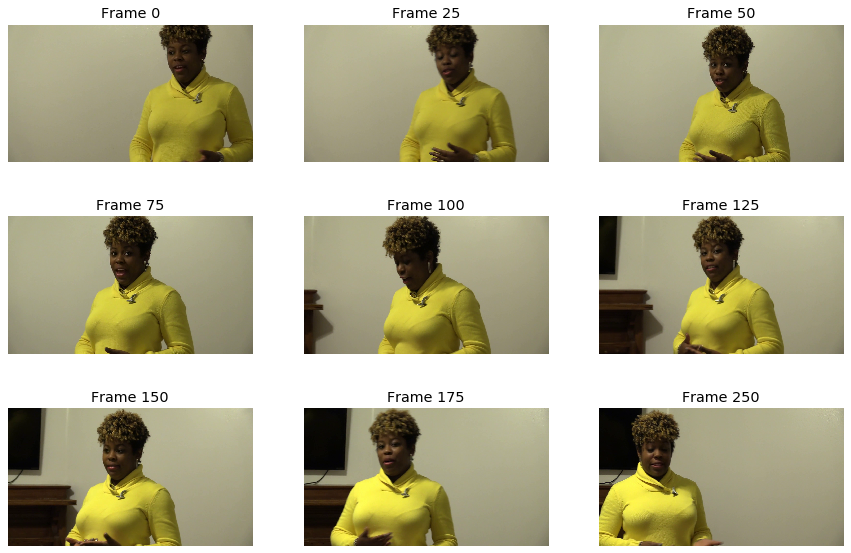

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

Now we can use the face detection to pull the faces from each frame in the video. Notice that the face coun't be detected for one of the frames.

Could not find face in frame 100


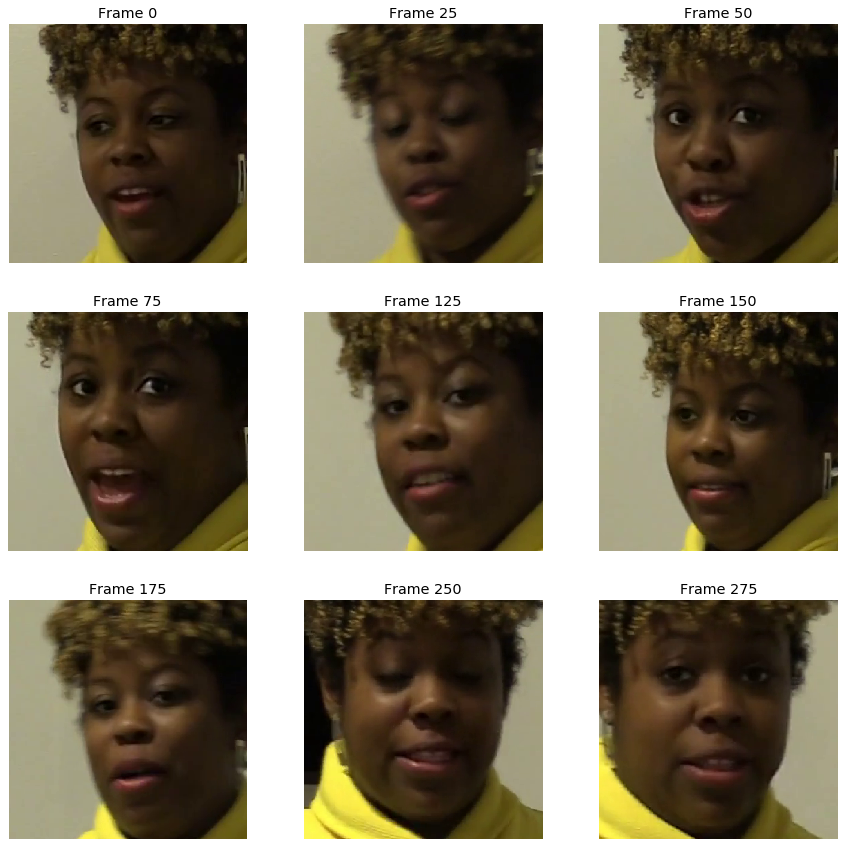

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

## Plotting facial landmarks for each frame

Could not identify face landmarks for frame 25
Could not identify face landmarks for frame 75
Count find face in frame 100
Could not identify face landmarks for frame 125
Could not identify face landmarks for frame 150
Could not identify face landmarks for frame 175
Could not identify face landmarks for frame 275


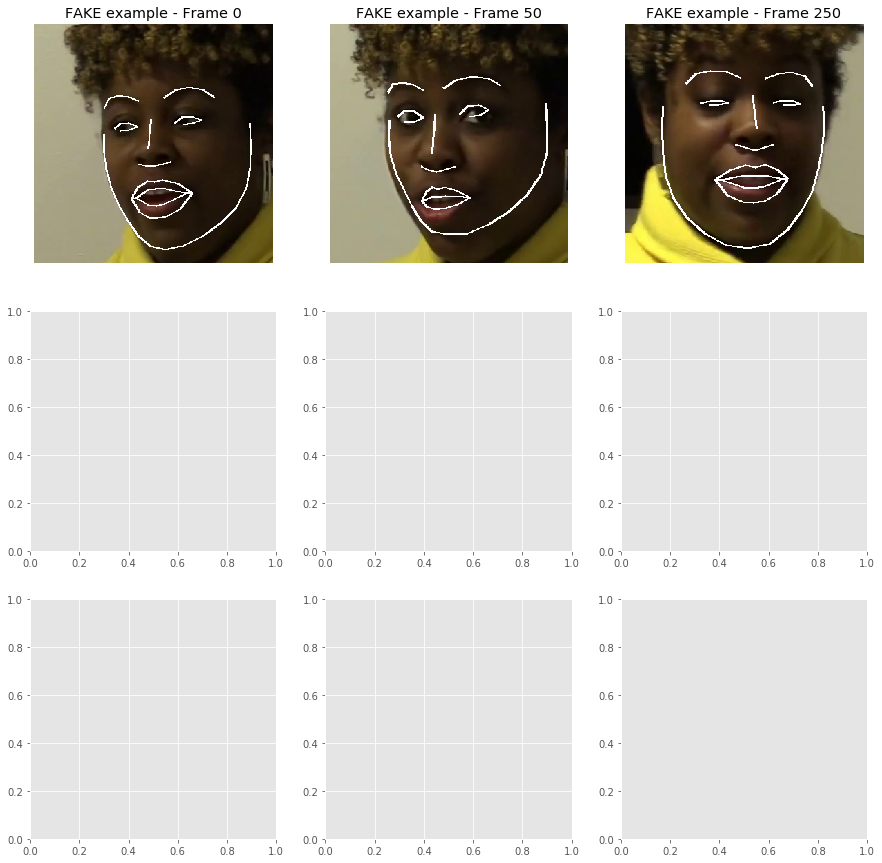

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'FAKE example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
plt.grid(False)
plt.show()

## Frame by frame of REAL example

The number of frames saved:  300
Could not identify face landmarks for frame 0
Could not identify face landmarks for frame 75
Could not identify face landmarks for frame 175
Could not identify face landmarks for frame 250
Could not identify face landmarks for frame 275


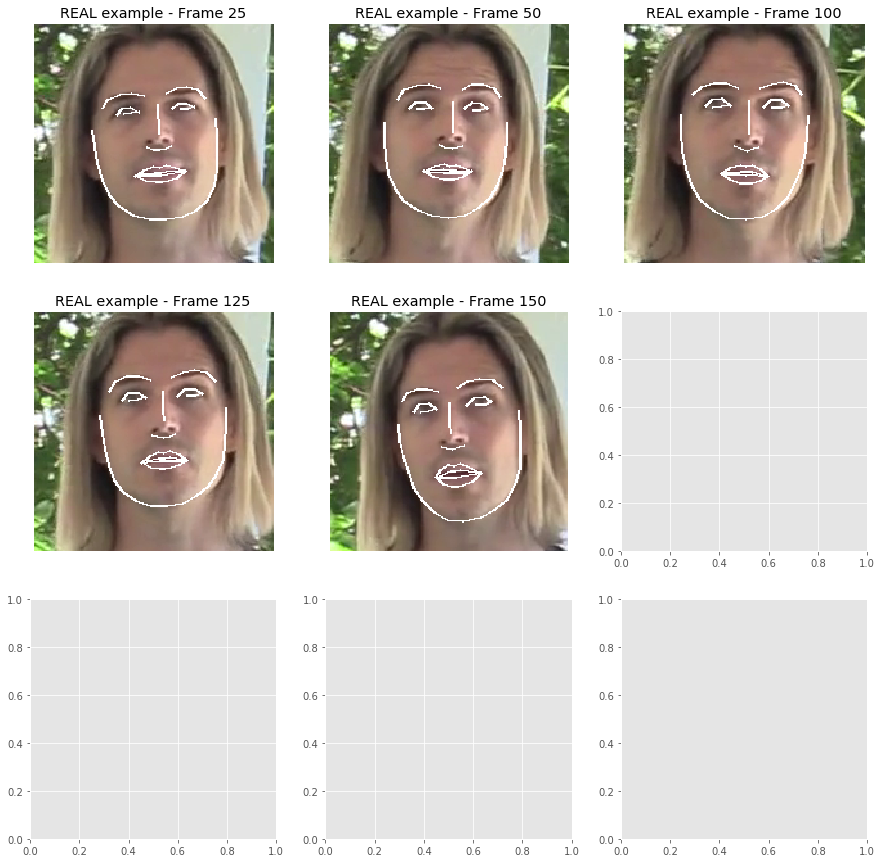

In [17]:
fn = 'ahqqqilsxt.mp4'
video_file = f'/kaggle/input/deepfake-detection-challenge/train_sample_videos/{fn}'

cap = cv2.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()

In [18]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [19]:
for i in range(1,50):
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image1 = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    
    frame2 = frames[i-1]
    image2 = cv.cvtColor(frame2, cv.COLOR_BGR2RGB)
    
    if mse(image1,image2)>100:
        print("Deepfaked!!! ",i)
#     print(mse(image1,image2))

Deepfaked!!!  14


In [20]:
from skimage.metrics import structural_similarity as compare_ssim
# from PIL import Image, ImageChops
  
# assign images
for i in range(1,50):
    frame1 = frames[i]
    
    frame2 = frames[i-1]
  
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    (score, diff) = compare_ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")
#     print("SSIM: {}".format(score))
    
    if score<0.96:
        print("Deepfaked!!!   ",i)

Deepfaked!!!    14
